In [15]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

# reading raw data file
data_train = pd.read_csv('Archivos_CSV_con_etiquetas/train_tortuga.csv')
data_train = data_train.drop(['gx','gy','gz'], axis=1)


# removing null values
data_train = data_train.dropna()
data_train.shape

# drop the rows where timestamp is 0
df = data_train[pd.to_datetime(data_train['dateTime_UTC']) != 0]

# now arrange data in ascending order of the user and timestamp
df = df.sort_values(by = ['dateTime_UTC'], ignore_index=True)


In [16]:
window_size = 98
step_size = int(window_size/2)

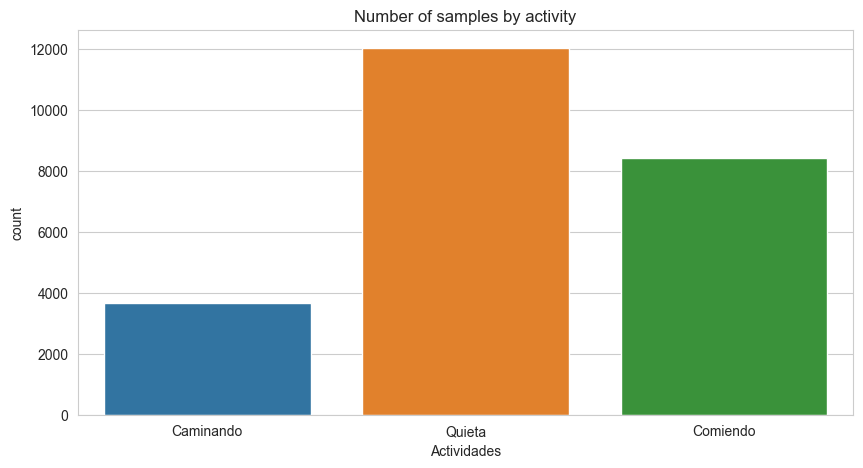

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Actividades', data = df)
plt.title('Number of samples by activity')
plt.show()

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib qt
for i in ['Caminando', 'Quieta', 'Comiendo']:
    data_ = df[(df['Actividades'] == i)][:250]
    plt.figure(figsize=(10, 6))

    # Crear las líneas con etiquetas
    sns.lineplot(y='ax', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='r', label='ax')
    sns.lineplot(y='ay', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='b', label='ay')
    sns.lineplot(y='az', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='y', label='az')

    # Añadir leyenda automáticamente
    plt.legend(fontsize=15)

    # Etiquetas y título
    plt.ylabel('Aceleración', fontsize=20)
    plt.xlabel('Tiempo', fontsize=20)
    plt.title(i, fontsize=20)

    # Mostrar gráfica
    plt.show()

In [54]:
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'ax').add_legend()
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'ay').add_legend()
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'az').add_legend()

In [17]:
df_train = data_train

In [18]:
x_list_train = []
y_list_train = []
z_list_train = []
train_labels = []

# creating overlaping windows of size window-size
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['ax'].values[i: i + window_size]
    ys = df_train['ay'].values[i: i + window_size]
    zs = df_train['az'].values[i: i + window_size]
    label = stats.mode(df_train['Actividades'][i: i + window_size])[0][0]

    x_list_train.append(xs)
    y_list_train.append(ys)
    z_list_train.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list_train).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list_train).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list_train).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list_train).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list_train).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list_train).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list_train).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list_train).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list_train).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list_train).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list_train).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list_train).apply(lambda x: x.max())

# median
X_train['x_median'] = pd.Series(x_list_train).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list_train).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list_train).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list_train).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list_train).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list_train).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list_train).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list_train).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list_train).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list_train).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list_train).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list_train).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list_train).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list_train).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list_train).apply(lambda x: len(find_peaks(x)[0]))


# energy
X_train['x_energy'] = pd.Series(x_list_train).apply(lambda x: np.sum(x**2)/window_size)
X_train['y_energy'] = pd.Series(y_list_train).apply(lambda x: np.sum(x**2)/window_size)
X_train['z_energy'] = pd.Series(z_list_train).apply(lambda x: np.sum(x**2)/window_size)

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list_train)**2 + pd.Series(y_list_train)**2 + pd.Series(z_list_train)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list_train).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_train).apply(lambda x: np.sum(abs(x)/window_size)) \
                  + pd.Series(z_list_train).apply(lambda x: np.sum(abs(x)/window_size))

In [19]:
# reading raw data file
data_test = pd.read_csv('Archivos_CSV_con_etiquetas/test_tortuga.csv')
data_test = data_test.drop(['gx','gy','gz'], axis=1)


# removing null values
data_test = data_test.dropna()
data_test.shape

# drop the rows where timestamp is 0
df_test = data_test[pd.to_datetime(data_test['dateTime_UTC']) != 0]

# now arrange data in ascending order of the user and timestamp
df_test = df_test.sort_values(by = ['dateTime_UTC'], ignore_index=True)

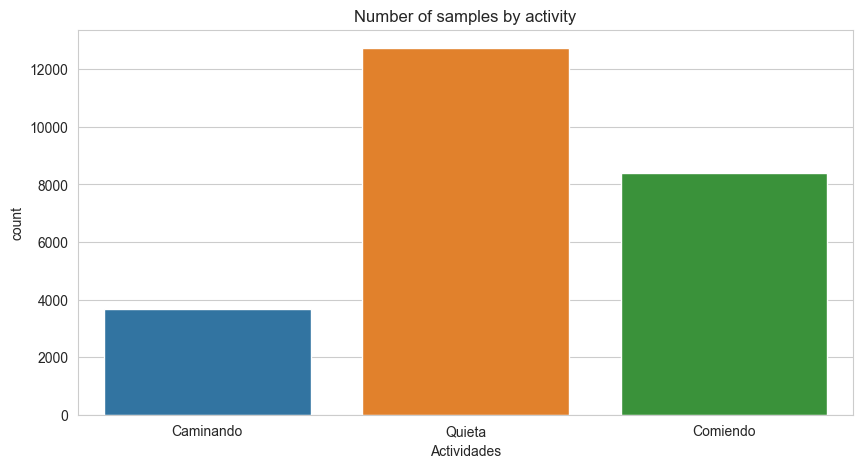

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Actividades', data = df_test)
plt.title('Number of samples by activity')
plt.show()

In [59]:
for i in ['Caminando', 'Quieta', 'Comiendo']:
  data_ = df[(df['Actividades'] == i)][:250]
  plt.figure(figsize = (15, 6))
  sns.lineplot(y = 'ax', x = pd.to_datetime(data_train['dateTime_UTC']), data = data_)
  sns.lineplot(y = 'ay', x = pd.to_datetime(data_train['dateTime_UTC']), data = data_)
  sns.lineplot(y = 'az', x = pd.to_datetime(data_train['dateTime_UTC']), data = data_)
  plt.legend(['ax', 'ay', 'az'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [60]:
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'ax').add_legend()
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'ay').add_legend()
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'az').add_legend()

In [22]:
x_list_test = []
y_list_test = []
z_list_test = []
test_labels = []



# creating overlaping windows of size window-size
for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['ax'].values[i: i + window_size]
    ys = df_test['ay'].values[i: i + window_size]
    zs = df_test['az'].values[i: i + window_size]
    label = stats.mode(df_test['Actividades'][i: i + window_size])[0][0]

    x_list_test.append(xs)
    y_list_test.append(ys)
    z_list_test.append(zs)
    test_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

# mean
X_test['x_mean'] = pd.Series(x_list_test).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list_test).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list_test).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list_test).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list_test).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list_test).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list_test).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list_test).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list_test).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list_test).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list_test).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list_test).apply(lambda x: x.max())


# median
X_test['x_median'] = pd.Series(x_list_test).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list_test).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list_test).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list_test).apply(lambda x: len(find_peaks(x)[0]))


# energy
X_test['x_energy'] = pd.Series(x_list_test).apply(lambda x: np.sum(x**2)/window_size)
X_test['y_energy'] = pd.Series(y_list_test).apply(lambda x: np.sum(x**2)/window_size)
X_test['z_energy'] = pd.Series(z_list_test).apply(lambda x: np.sum(x**2)/window_size)

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list_test)**2 + pd.Series(y_list_test)**2 + pd.Series(z_list_test)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list_test).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_test).apply(lambda x: np.sum(abs(x)/window_size)) \
                  + pd.Series(z_list_test).apply(lambda x: np.sum(abs(x)/window_size))

In [23]:
act = np.array(train_labels)
act_test = np.array(test_labels)

### Regresión lineal

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, act)
act_pred = lr.predict(X_test_data_lr)
print("Accuracy:", accuracy_score(act_test, act_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(act_test,act_pred))

Accuracy: 0.8650793650793651

 -------------Classification Report-------------

              precision    recall  f1-score   support

   Caminando       0.95      0.84      0.89        73
    Comiendo       0.88      0.78      0.83       171
      Quieta       0.84      0.93      0.88       260

    accuracy                           0.87       504
   macro avg       0.89      0.85      0.87       504
weighted avg       0.87      0.87      0.86       504



In [10]:
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


labels = ['Caminando', 'Quieta', 'Comiendo']

# Generar la matriz de confusión
confusion_matrix = confusion_matrix(act_test, act_pred)

# Crear figura y ejes
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='autumn')  # Cambiar el colormap aquí

# Mostrar todas las etiquetas de las clases
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotar las etiquetas para que sean legibles
#plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

# Mostrar los valores de cada celda
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black", fontsize=18)

# Configuración del título y etiquetas de los ejes
plt.title("Matriz de confusión con regresión logística", fontsize=18)
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Valores reales', fontsize=18)

# Agregar la barra de referencia al lado
cbar=plt.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=18)

# Eliminar las líneas divisorias entre los cuadrados
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(False)
plt.show()

### Gráficas temporales

In [25]:
%matplotlib qt
import matplotlib.pyplot as plt
import math

labels = ['Caminando', 'Quieta', 'Comiendo']
colors = []
for i in range(len(act_pred)):
    if act_pred[i] == labels[0]:
        colors.append('red')
    elif act_pred[i] == labels[1]:
        colors.append('blue')
    elif act_pred[i] == labels[2]:
        colors.append('gray')
     
colors_par = colors[::2]
colors_impar = colors[1::2]

colores_verdaderos = []
for i in range(len(df_test['Actividades'])):
    if df_test['Actividades'][i] == labels[0]:
        colores_verdaderos.append('red')
    elif df_test['Actividades'][i] == labels[1]:
        colores_verdaderos.append('blue')
    elif df_test['Actividades'][i] == labels[2]:
        colores_verdaderos.append('gray')
    

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
size = 5
frec=14.45354719
step = 28
i = 0

N = len(colors_impar) * window_size


while i < N-step:
    if i < window_size / 2:
        ax1.scatter(i / frec, df_test['ax'][i], color=colors_par[int(math.floor(i / window_size))], s=size)
    if i > window_size / 2 and i < N and i-math.floor(i/window_size)>window_size/2:
        if colors_par[int(math.floor(i / window_size))]==colors_impar[int(math.floor(i / window_size))]:
            ax1.scatter(i / frec, df_test['ax'][i], color=colors_par[int(math.floor(i / window_size))], s=size)
        else:
            ax1.scatter(i / frec, df_test['ax'][i] + 0.1, color=colors_par[int(math.floor(i / window_size))], s=size)
            ax1.scatter(i / frec, df_test['ax'][i] - 0.1, color=colors_impar[int(math.floor(i / window_size))], s=size)
    elif i > window_size / 2 and i < N and i-math.floor(i/window_size)<window_size/2:
        if colors_par[int(math.floor(i / window_size))]==colors_impar[int(math.floor(i / window_size))+1]:
            ax1.scatter(i / frec, df_test['ax'][i] + 0.1, color=colors_par[int(math.floor(i / window_size))], s=size)
        else:    
            ax1.scatter(i / frec, df_test['ax'][i] + 0.1, color=colors_par[int(math.floor(i / window_size))], s=size)
            ax1.scatter(i / frec, df_test['ax'][i] - 0.1, color=colors_impar[int(math.floor(i / window_size))+1], s=size)
    if i > N:
        ax1.scatter(i / frec, df_test['ax'][i], color=colors_impar[int(math.floor(i / window_size))], s=size)
    ax2.scatter(i / frec, df_test['ax'][i], color=colores_verdaderos[i], s=size)
    i += step

# Añadir puntos invisibles para la leyenda
for label, color in zip(labels, ['red','blue','gray']):
    ax2.scatter([], [], color=color, label=label)

ax1.set_title('Predicciones con regresión logística', fontsize=18)
ax2.set_title('Actividades reales', fontsize=18)

ax1.set_ylabel('ax [$m/s^2$]', fontsize=18)
ax2.set_ylabel('ax [$m/s^2$]', fontsize=18)

ax2.set_xlabel('Tiempo [s]', fontsize=18)

ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)


ax1.grid(False)
ax2.grid(False)
ax1.set_ylim(-2, 2)
ax2.set_ylim(-2, 2)

# Mostrar la leyenda en una posición específica
ax2.legend(loc=(0.8,0.75), fontsize=18)  # Puedes cambiar 'upper right' por cualquier valor de los mencionados o una tupla (x, y)

plt.show()

### Random Forest

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd


# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_rf = scaler.transform(X_train)
X_test_data_rf = scaler.transform(X_test)


#Entrenar el modelo
modeloX = RandomForestClassifier(random_state=21)
modeloX.fit(X_train_data_rf, act)

#Evaluar el modelo
act_pred_rf = modeloX.predict(X_test_data_rf)
accuracyX = accuracy_score(act_test, act_pred_rf)
precision_recall_fscore = precision_recall_fscore_support(act_test,act_pred_rf,average=None)

print("Accuracy del modelo en X:", accuracyX)
print(classification_report(act_test,act_pred))
print("Feature importances:\n{}".format(modeloX.feature_importances_))


Accuracy del modelo en X: 0.9067460317460317
              precision    recall  f1-score   support

   Caminando       0.95      0.84      0.89        73
    Comiendo       0.88      0.78      0.83       171
      Quieta       0.84      0.93      0.88       260

    accuracy                           0.87       504
   macro avg       0.89      0.85      0.87       504
weighted avg       0.87      0.87      0.86       504

Feature importances:
[0.02034313 0.04759276 0.02421925 0.02590016 0.03298659 0.06038311
 0.03396297 0.04475859 0.03261323 0.01071221 0.05856128 0.00773877
 0.03232232 0.02396238 0.00848194 0.01918934 0.03373011 0.02182533
 0.02675925 0.02746049 0.01638955 0.02064377 0.02132985 0.01293011
 0.01183367 0.06688512 0.         0.01408888 0.04559403 0.
 0.00470926 0.00418366 0.0064343  0.02264867 0.0188769  0.00288179
 0.01020893 0.00770582 0.03096335 0.04143108 0.04675808]


In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

%matplotlib qt
labels = ['Caminando', 'Quieta', 'Comiendo']

# Generar la matriz de confusión
confusion_matrix = confusion_matrix(act_test, act_pred_rf)

# Crear figura y ejes
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='autumn')  # Cambiar el colormap aquí

# Mostrar todas las etiquetas de las clases
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotar las etiquetas para que sean legibles
#plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

# Mostrar los valores de cada celda
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black", fontsize=16)

# Configuración del título y etiquetas de los ejes
plt.title("Matriz de confusión con random forest", fontsize=18)
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Valores reales', fontsize=18)

# Agregar la barra de referencia al lado
cbar=plt.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=18)

# Eliminar las líneas divisorias entre los cuadrados
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(False)
plt.show()

In [29]:
%matplotlib qt
import matplotlib.pyplot as plt
import math

labels = ['Caminando', 'Quieta', 'Comiendo']
colors = []
for i in range(len(act_pred_rf)):
    if act_pred_rf[i] == labels[0]:
        colors.append('red')
    elif act_pred_rf[i] == labels[1]:
        colors.append('blue')
    elif act_pred_rf[i] == labels[2]:
        colors.append('gray')
     
colors_par = colors[::2]
colors_impar = colors[1::2]

colores_verdaderos = []
for i in range(len(df_test['Actividades'])):
    if df_test['Actividades'][i] == labels[0]:
        colores_verdaderos.append('red')
    elif df_test['Actividades'][i] == labels[1]:
        colores_verdaderos.append('blue')
    elif df_test['Actividades'][i] == labels[2]:
        colores_verdaderos.append('gray')
    

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
size = 5
frec=14.45354719
step = 28
i = 0

N = len(colors_impar) * window_size


while i < N-step:
    if i < window_size / 2:
        ax1.scatter(i / frec, df_test['ax'][i], color=colors_par[int(math.floor(i / window_size))], s=size)
    if i > window_size / 2 and i < N and i-math.floor(i/window_size)>window_size/2:
        if colors_par[int(math.floor(i / window_size))]==colors_impar[int(math.floor(i / window_size))]:
            ax1.scatter(i / frec, df_test['ax'][i], color=colors_par[int(math.floor(i / window_size))], s=size)
        else:
            ax1.scatter(i / frec, df_test['ax'][i] + 0.1, color=colors_par[int(math.floor(i / window_size))], s=size)
            ax1.scatter(i / frec, df_test['ax'][i] - 0.1, color=colors_impar[int(math.floor(i / window_size))], s=size)
    elif i > window_size / 2 and i < N and i-math.floor(i/window_size)<window_size/2:
        if colors_par[int(math.floor(i / window_size))]==colors_impar[int(math.floor(i / window_size))+1]:
            ax1.scatter(i / frec, df_test['ax'][i] + 0.1, color=colors_par[int(math.floor(i / window_size))], s=size)
        else:    
            ax1.scatter(i / frec, df_test['ax'][i] + 0.1, color=colors_par[int(math.floor(i / window_size))], s=size)
            ax1.scatter(i / frec, df_test['ax'][i] - 0.1, color=colors_impar[int(math.floor(i / window_size))+1], s=size)
    if i > N:
        ax1.scatter(i / frec, df_test['ax'][i], color=colors_impar[int(math.floor(i / window_size))], s=size)
    ax2.scatter(i / frec, df_test['ax'][i], color=colores_verdaderos[i], s=size)
    i += step

# Añadir puntos invisibles para la leyenda
for label, color in zip(labels, ['red','blue','gray']):
    ax2.scatter([], [], color=color, label=label)

ax1.set_title('Predicciones con random forest', fontsize=18)
ax2.set_title('Actividades reales', fontsize=18)

ax1.set_ylabel('ax [$m/s^2$]', fontsize=18)
ax2.set_ylabel('ax [$m/s^2$]', fontsize=18)

ax2.set_xlabel('Tiempo [s]', fontsize=18)

ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)


ax1.grid(False)
ax2.grid(False)
ax1.set_ylim(-2, 2)
ax2.set_ylim(-2, 2)

# Mostrar la leyenda en una posición específica
ax2.legend(loc=(0.8,0.75), fontsize=18)  # Puedes cambiar 'upper right' por cualquier valor de los mencionados o una tupla (x, y)

plt.show()